In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np


from sky_spot.utils import COSTS, ClusterType
import utils
from plot import *

sns.set_style('whitegrid')

InitMatplotlib(7, 7)




use_tex True 
font_size 7 
title_size 7


In [2]:
# EXP_PATH = '../../exp-for-plot/real/ddl=search+task=48+overhead=0.05/real'
EXP_PATH = '../../exp-for-plot/real/2023-02-15/ddl=search+task=48+overhead=0.01/real'
# EXP_PATH = '../../exp-for-plot/real/2023-02-15/ddl=search+task=48+overhead=0.20/real'
df = utils.get_dfs_from_exp(EXP_PATH)
df

/home/gcpuser/skypilot-spot-strategy/scripts/plots/utils.py:48: RuntimeWarning: Mean of empty slice.
  avg_wait_hours = get_consecutive_1s(
/opt/conda/envs/sky-spot/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/gcpuser/skypilot-spot-strategy/scripts/plots/utils.py:47: RuntimeWarning: Mean of empty slice.
  avg_spot_hours = spot_hours.mean()


,trace,env,strategy,deadline_hours,task_hours,task_fraction,gap_seconds,avg_spot_hours,avg_wait_hours,num_slices,spot_fraction,cost
0,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,5.166667,0.987500,None,0.839583,46.806110
1,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,14.159167,2.302083,None,0.884948,46.806110
2,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,7.377500,0.622917,None,0.922188,46.753400
3,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,2.849167,1.211623,None,0.712292,46.911529
4,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,10.864286,0.659028,None,0.950625,46.753400
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,2.667708,1.155556,None,0.711389,109.204420
59396,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,8.341667,0.232143,None,0.973194,46.806110
59397,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,9.086458,5.917708,None,0.605764,120.342712
59398,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,3.688750,2.312917,None,0.614792,115.195562


In [3]:
greedy_df = df[df['strategy'] == 'strawman']
# greedy_df = greedy_df[greedy_df['deadline_hours'] == 72]
# greedy_df = greedy_df[greedy_df['env'] == 'us-east-2b_v100_1']
# greedy_df = greedy_df[(greedy_df['spot_fraction'] < 0.6) & (greedy_df['spot_fraction'] > 0.4)]

on_demand_cost = COSTS[ClusterType.ON_DEMAND]
spot_cost = COSTS[ClusterType.SPOT]

r = greedy_df['avg_spot_hours'] / (greedy_df['avg_spot_hours'] + greedy_df['avg_wait_hours'])
R_0 = greedy_df['deadline_hours']
C_0 = greedy_df['task_hours']
t = (R_0  - C_0) / (1 - r)
spot_time = r * t
spot_time = np.where(spot_time > C_0, C_0, spot_time)

vm_time = (R_0 - t)
vm_time = np.where(vm_time > C_0, C_0, vm_time)
vm_time = np.where(r * t > C_0, 0, vm_time)

greedy_df['theoretical_cost'] = spot_time * spot_cost + vm_time * on_demand_cost
greedy_df

/tmp/ipykernel_21034/566811919.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greedy_df['theoretical_cost'] = spot_time * spot_cost + vm_time * on_demand_cost


,trace,env,strategy,deadline_hours,task_hours,task_fraction,gap_seconds,avg_spot_hours,avg_wait_hours,num_slices,spot_fraction,cost,theoretical_cost
0,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,5.166667,0.987500,None,0.839583,46.806110,46.708800
1,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,14.159167,2.302083,None,0.884948,46.806110,46.708800
2,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,7.377500,0.622917,None,0.922188,46.753400,46.708800
3,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,2.849167,1.211623,None,0.712292,46.911529,46.708800
4,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-west-2a_v100_1,strawman,80.0,48.0,0.6,195,10.864286,0.659028,None,0.950625,46.753400,46.708800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,2.667708,1.155556,None,0.711389,109.204420,89.066348
59396,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,8.341667,0.232143,None,0.973194,46.806110,46.708800
59397,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,9.086458,5.917708,None,0.605764,120.342712,108.427554
59398,../../exp-for-plot/real/2023-02-15/ddl=search+...,us-east-2b_v100_1,strawman,60.0,48.0,0.8,195,3.688750,2.312917,None,0.614792,115.195562,106.940546


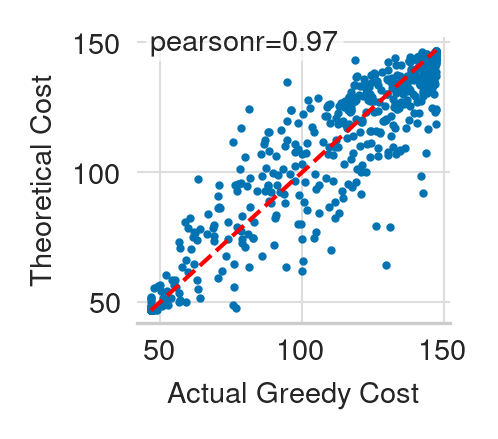

In [14]:
from scipy.stats import pearsonr

colors = sns.color_palette('colorblind', 10)

non_zero = greedy_df[greedy_df['theoretical_cost'] > 0].sample(1000)
# non_zero = greedy_df.dropna(subset=['theoretical_cost']).sample(500)
fig = plt.figure(figsize=(fig_width/2, fig_width/2 - .2), dpi=300)
ax = fig.add_subplot(111)
non_zero[['cost', 'theoretical_cost']].plot(kind='scatter', x='cost', y='theoretical_cost', ax=ax, s=1, color=colors[0])

cor, _ = pearsonr(non_zero['cost'], non_zero['theoretical_cost'])

min_val = min(non_zero['cost'].min(), non_zero['theoretical_cost'].min())
max_val = max(non_zero['cost'].max(), non_zero['theoretical_cost'].max())
ax.set_yticks(ax.get_xticks())

ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
ax.text(min_val,
        max_val,
        f'pearsonr={cor:.2f}',
        bbox=dict(facecolor='white',
                  alpha=0.6,
                  edgecolor='white',
                  boxstyle='round,pad=0.1'))
ax.set_ylabel('Theoretical Cost')
ax.set_xlabel('Actual Greedy Cost')

fig.tight_layout()
fig.savefig('figures/theory-cost.pdf', bbox_inches='tight', pad_inches=0)

In [5]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

import numpy as np

from sky_spot.traces import random_start
from plot import *

sns.set_style('whitegrid')
InitMatplotlib(7, 7)
# RAW_PATH = '../../data/real/availability/2023-02-15/parsed'
# RAW_PATH = '../../data/real/ping_based_complete'
RAW_PATH = '../../data/real/availability/2023-02-15/parsed'

LENGTH_HOURS = list(range(1, 80))

use_tex True 
font_size 7 
title_size 7


In [6]:
from collections import defaultdict
from tqdm import tqdm

env_df = pd.DataFrame(columns=[
    'file',
    'length_hours',
    'spot_fraction',
    'avg_spot_fraction',
    'variance',
])

length_hours = 80

NUM_SLICES = list(range(1, 80))
slice_variances = [[] for _ in NUM_SLICES]

# for file in tqdm(os.listdir(RAW_PATH)):
#     if not file.endswith('.json'):
#         continue
#     raw_path = os.path.join(RAW_PATH, file)
#     output_dir = os.path.join(raw_path.replace('data', 'exp'),
#                                 f'length={length_hours}h')
#     os.makedirs(output_dir, exist_ok=True)
#     random_start.generate_random_traces(
#         raw_path,
#         num_traces=300,
#         trace_length_hours=length_hours,
#         output_dir=output_dir,
#     )
#     for trace in os.listdir(output_dir):
#         if not trace.endswith('.json'):
#             continue
#         trace_path = os.path.join(output_dir, trace)
#         with open(trace_path, 'r') as f:
#             data = json.load(f)['data']
#         availability = 1 - np.array(data)
#         for num_slices in NUM_SLICES:
#             availability_slices = np.array_split(availability, num_slices)
#             slice_variance = np.mean([np.var(slice) for slice in availability_slices if len(slice) > 0])
#             slice_variances[num_slices-1].append(slice_variance)
#     env_df = pd.concat([env_df,
#         pd.DataFrame({
#             'file': [file.replace('.json', '')] * len(NUM_SLICES),
#             'num_slices': NUM_SLICES,
#             'variance': [np.mean(slice_variances[num_slices-1]) for num_slices in NUM_SLICES],
#         })],
#         ignore_index=True)


for length_hours in LENGTH_HOURS:
    spot_fraction = []
    for file in os.listdir(RAW_PATH):
        if not file.endswith('.json'):
            continue
        raw_path = os.path.join(RAW_PATH, file)
        output_dir = os.path.join(raw_path.replace('data', 'exp'),
                                f'length={length_hours}h')
        os.makedirs(output_dir, exist_ok=True)
        random_start.generate_random_traces(
            raw_path,
            num_traces=300,
            trace_length_hours=length_hours,
            output_dir=output_dir,
        )
        for trace in os.listdir(output_dir):
            if not trace.endswith('.json'):
                continue
            trace_path = os.path.join(output_dir, trace)
            with open(trace_path, 'r') as f:
                data = json.load(f)['data']
            availability = 1 - np.array(data)
            spot_fraction.append(np.mean(availability))

        env_df = env_df.append(
            {
                'file': file.replace('.json', ''),
                'length_hours': length_hours,
                'num_slices': 80 / length_hours,
                # 'spot_fraction': spot_fraction,
                'avg_spot_fraction': np.mean(spot_fraction),
                'variance': np.var(spot_fraction),
            },
            ignore_index=True)


/tmp/ipykernel_21034/364874176.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env_df = env_df.append(
/tmp/ipykernel_21034/364874176.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env_df = env_df.append(
/tmp/ipykernel_21034/364874176.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env_df = env_df.append(
/tmp/ipykernel_21034/364874176.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env_df = env_df.append(
/tmp/ipykernel_21034/364874176.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env_df = env_df.append(
/tmp/ipykernel_

In [7]:
envs = env_df['file'].unique()
envs

array(['us-west-2a_v100_1', 'us-west-2b_v100_1', 'us-east-1d_v100_1',
       'us-east-2a_v100_1', 'us-east-1f_v100_1', 'us-west-2c_v100_1',
       'us-east-1c_v100_1', 'us-east-1a_v100_1', 'us-east-2b_v100_1'],
      dtype=object)

In [16]:
env_paths = [
            # 'us-west-2a_v100_1',
            # 'us-west-2b_v100_1',
            # 'us-east-1d_v100_1',
            # 'us-east-2a_v100_1',
            'us-east-1f_v100_1',
            'us-west-2c_v100_1',
            # 'us-east-1c_v100_1',
            'us-east-1a_v100_1',
            'us-east-2b_v100_1',
        ]


/tmp/ipykernel_21034/2119904360.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['file'] = plot_df['file'].apply(lambda x: x.replace('_v100_1', ''))
/tmp/ipykernel_21034/2119904360.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.sort_values(['file', 'num_slices'], inplace=True)
/tmp/ipykernel_21034/2119904360.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(


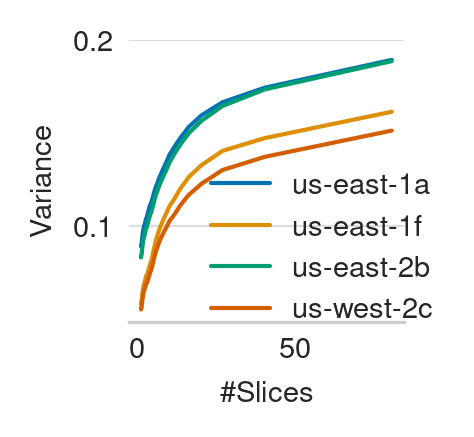

In [17]:
if 'length_hours' in env_df.columns:
    env_df['num_slices'] = 80 / env_df['length_hours']
fig = plt.figure(figsize=(fig_width/2, fig_width /2-.2), dpi=300)
ax = fig.add_subplot(111)

colors = sns.color_palette('colorblind', 10)

spot_fraction = env_df['avg_spot_fraction'].mean()
plot_df = env_df[env_df['file'].isin(env_paths)]
plot_df['file'] = plot_df['file'].apply(lambda x: x.replace('_v100_1', ''))
plot_df.sort_values(['file', 'num_slices'], inplace=True)
sns.lineplot(
    x=plot_df['num_slices'],
    y=plot_df['variance'],
    hue=plot_df['file'],
    ax=ax,
    palette=colors,
)
ax.set_title('')
ax.set_xlabel('\#Slices')
ax.set_ylabel('Variance')
ax.set_yticks([0.1, 0.2])
# ax.set_yticks([0.1])
ax.legend(
    loc='lower right',
    bbox_to_anchor=(1.2, -.1),
)

fig.tight_layout()
fig.savefig('figures/variance.pdf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_21034/3506894924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['file'] = plot_df['file'].apply(lambda x: x.replace('_v100_1', ''))
/tmp/ipykernel_21034/3506894924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.sort_values(['file', 'length_hours'], inplace=True)
/tmp/ipykernel_21034/3506894924.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(


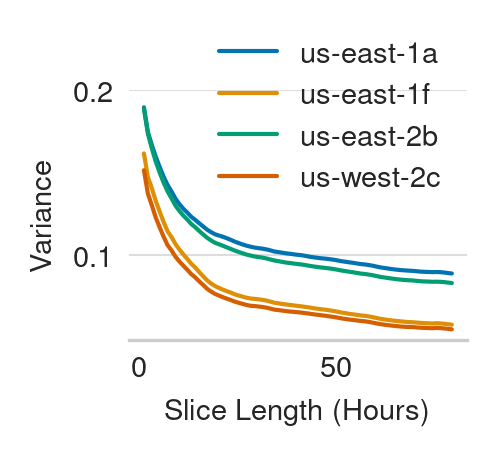

In [10]:
fig = plt.figure(figsize=(fig_width/2, fig_width /2), dpi=300)
ax = fig.add_subplot(111)

colors = sns.color_palette('colorblind', 10)

spot_fraction = env_df['avg_spot_fraction'].mean()
plot_df = env_df[env_df['file'].isin(env_paths)]
plot_df['file'] = plot_df['file'].apply(lambda x: x.replace('_v100_1', ''))
plot_df.sort_values(['file', 'length_hours'], inplace=True)
sns.lineplot(
    x=plot_df['length_hours'],
    y=plot_df['variance'],
    hue=plot_df['file'],
    ax=ax,
    palette=colors,
)
ax.set_title('')
ax.set_xlabel('Slice Length (Hours)')
ax.set_ylabel('Variance')
ax.set_yticks([0.1, 0.2])
# ax.set_yticks([0.1])
ax.legend(
    loc='upper right',
    bbox_to_anchor=(1, 1.3),
)

fig.tight_layout()
fig.savefig('figures/variance.pdf', bbox_inches='tight')

In [11]:
raise
df.sort_values(by='avg_spot_fraction', inplace=True, ascending=False)

env_paths = df.file.unique()

fig = plt.figure(figsize=(fig_width, fig_height + .2), dpi=300)
axes = fig.subplots(len(env_paths) // 2, 2, sharex=True, sharey=True)
for i, env_path in enumerate(env_paths):
    ax = axes[i // 2, i % 2]
    env_df = df[df['file'].str.contains(env_path)]

    spot_fraction = env_df['avg_spot_fraction'].mean()
    sns.lineplot(
        x=env_df['length_hours'],
        y=env_df['variance'],
        ax=ax,
    )
    ax.set_title(f'{env_path.replace(".json", "")}'
                 f'\n(Spot fraction: {spot_fraction:.2f})')
    ax.set_xlabel('Slice Length (Hours)')
    ax.set_ylabel('Variance')
    ax.set_yticks([0.1])

fig.tight_layout()
fig.savefig('figures/variance.pdf', bbox_inches='tight')

RuntimeError: No active exception to reraise